# Explore here

PROYECTO K-MEANS

In [88]:
import pandas as pd
import numpy as np
import os
import requests

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split


from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_score

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

import warnings

In [89]:
warnings.filterwarnings("ignore")

In [90]:
archivo = "https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv"

In [91]:
# 2Nombre y ruta de la carpeta para datos en crudo
raw_data_folder = "data/raw"
raw_data_path = os.path.join(raw_data_folder, "housing.csv")

# Crear la carpeta si no existe
if not os.path.exists(raw_data_folder):
    os.makedirs(raw_data_folder)

# Petición para descargar el fichero
response = requests.get(archivo)

# Verificar si la descarga fue exitosa
if response.status_code == 200:
    # Guardar el contenido en la carpeta en crudo
    with open(raw_data_path, 'wb') as file:
        file.write(response.content)
    print("Archivo guardado en crudo exitosamente en:", raw_data_path)
else:
    print("Error al descargar el archivo:", response.status_code)

# Leer el archivo CSV descargado 
df = pd.read_csv(raw_data_path)

Archivo guardado en crudo exitosamente en: data/raw/housing.csv


In [92]:
df.shape

(20640, 9)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [94]:

#Eliminamos las variables que no necesitamos
df_n= df.drop(["HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup", "MedHouseVal"], axis = 1)




In [95]:
# Dividimos el conjunto de datos en muestras de train y test

X = df_n

X_train, X_test= train_test_split(X,   test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)




(16512, 3)
(4128, 3)


In [96]:
# Entrenar el modelo
model = KMeans(n_clusters = 6, random_state = 42)
model.fit(X_train)

KMeans(n_clusters=6, random_state=42)

In [ ]:
#Predicción clusters
clusters = model.predict(X_train)


In [ ]:
#Añadimos columna clusters
X_train["clusters"] = clusters

X_train.head(10)

,MedInc,Latitude,Longitude,clusters
14196,3.2596,32.71,-117.03,3
8267,3.8125,33.77,-118.16,1
17445,4.1563,34.66,-120.48,1
14265,1.9425,32.69,-117.11,3
2271,3.5542,36.78,-119.80,5
17848,6.6227,37.42,-121.86,0
6252,2.5192,34.04,-117.97,3
9389,7.9892,37.91,-122.53,0
6113,1.5000,34.13,-117.90,3
6061,6.4266,34.02,-117.79,2


In [99]:
# Obtener los centros de los clusters y las etiquetas
centroids = model.cluster_centers_
labels = model.labels_

In [100]:
centroids

array([[   5.37914949,   37.68747253, -121.91549044],
       [   4.34929638,   33.88940929, -118.00301129],
       [   6.94251551,   33.84943618, -118.04112764],
       [   2.42859805,   34.04157015, -118.02425727],
       [  11.74873415,   35.87817073, -120.28422764],
       [   2.73992841,   38.14364263, -121.62299724]])

In [101]:
labels

array([3, 1, 1, ..., 3, 0, 5], shape=(16512,), dtype=int32)

<Axes: xlabel='Latitude', ylabel='Longitude'>

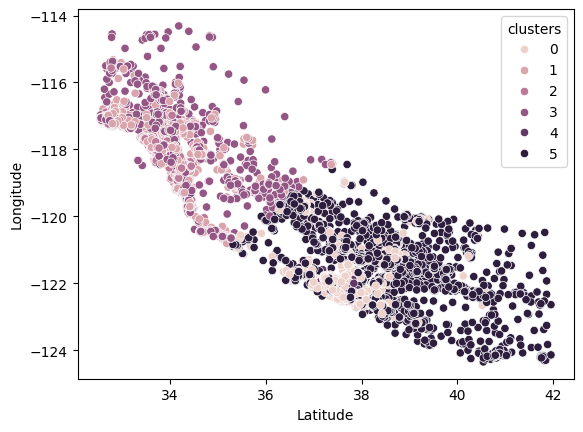

In [126]:
# Visualizar los resultados
sns.scatterplot(data = X_train, x = "Latitude", y = "Longitude", hue= "clusters")

In [124]:
# Visualizar los resultados
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')

plt.title("KMeans Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

InvalidIndexError: (slice(None, None, None), 0)